### This part trains a neural network so the trained model can give corect results.
Reads the dataset and then then presents the input and the result to the network so it can calibrate the network.
The result of the training is shown below and it reaches 10% after 3 epocs, the network continues to get better since both the training loss and the validation loss decreases. This means that it will generalise better in the future if it is given data from the same distribution that it has not seen before.
This will be tested below...

epoch,train_loss,valid_loss,accuracy
1,2.290952,2.533179,0.160714
2,2.086131,2.321064,0.160714
3,1.976200,2.092955,0.250000
4,1.898390,1.947939,0.285714
5,1.835881,1.793435,0.214286
6,1.778878,1.661338,0.357143
7,1.721472,1.594236,0.410714
8,1.668627,1.440683,0.410714
9,1.626788,1.523524,0.178571
10,1.576496,1.526036,0.339286


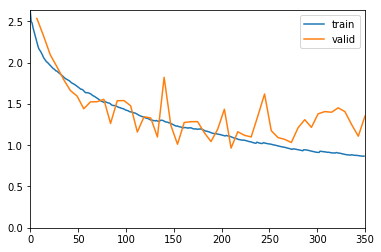

CPU times: user 1min 17s, sys: 1min 6s, total: 2min 23s
Wall time: 2min 29s


In [17]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
dataSet = pd.read_csv("skane_around.csv")
dataSet_used = dataSet[['time','geoHash','journey']]
cat_names  = ['weekday']
cont_names = ['time','geoHash']
valid_idx = list(np.random.randint(0,len(dataSet),int(len(dataSet)*0.1)))
data = (TabularList.from_df(dataSet_used,cont_names=cont_names,cat_names = None, procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[2000,1000],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(50)

## Using lat long
And helping by extracting weekday??

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


epoch,train_loss,valid_loss,accuracy
1,2.722786,2.652849,0.053571
2,2.632817,2.644275,0.089286
3,2.499550,2.595537,0.232143
4,2.348837,2.454515,0.303571
5,2.193277,2.183000,0.428571
6,2.016659,1.790133,0.535714
7,1.821771,1.342733,0.857143
8,1.613703,0.919168,0.946429
9,1.411061,0.496181,0.946429
10,1.221815,0.292458,0.928571


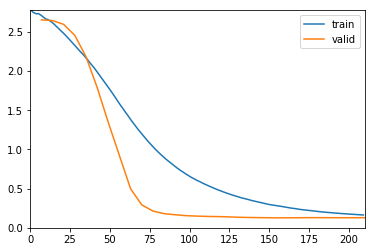

CPU times: user 14.1 s, sys: 12 s, total: 26.1 s
Wall time: 29.3 s


In [97]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
import datetime
dataSet = pd.read_csv("skane_around.csv")
dataSet_used = dataSet[['time','latitude','longitude','journey']]
dataSet_used["weekday"] = pd.to_datetime(dataSet_used['time'],unit='ms').dt.weekday
#dataSet_used["stuff"] = dataSet["time"]/2000000
cat_names  = ['weekday']
cont_names  = ['latitude','longitude','time']
valid_idx = list(np.random.randint(0,len(dataSet),int(len(dataSet)*0.1)))
data = (TabularList.from_df(dataSet_used,cont_names=cont_names,cat_names=cat_names,procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(30)
#dataSet_used.head(200)

In [33]:
import datetime
print (datetime.datetime.fromtimestamp(1548658859031/1000).strftime("%A"))
#datetime.datetime.fromtimestamp(1548658859031/1000).weekday()

Monday
